# Coding Block 1 - Random Forests

### Load the packages

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
'''
...
'''

'\n...\n'

### Read the dataset 
You can also compare processed and non-processed data.

In [2]:
diab=pd.read_csv('diabetes.csv')
diab_cleaned=pd.read_csv('diabetes_cleaned.csv')

### Split the data and train a Random Forest model and an XGBoost model

In [ ]:
# Function to train and evaluate random forest model
def train_evaluate_rf(data, dataset_name):
    # Split the data into features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Create and train the model with default parameters first
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"=== Random Forest Results for {dataset_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - RF - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance - RF - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    # Return the model and feature importance for further analysis
    return rf, feature_importance

# Function to train and evaluate XGBoost model
def train_evaluate_xgb(data, dataset_name):
    # Split the data into features and target
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Create and train the model with default parameters first
    xgb_model = xgb.XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"=== XGBoost Results for {dataset_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - XGB - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance - XGB - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    # Return the model and feature importance for further analysis
    return xgb_model, feature_importance

# Hyperparameter tuning function for Random Forest
def tune_rf_hyperparameters(data, dataset_name):
    # Split the data
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Simplified grid for faster execution if needed
    param_grid_simple = {
        'n_estimators': [100],
        'max_depth': [10, 20],
        'min_samples_split': [10],
        'min_samples_leaf': [2, 4]
    }
    
    # Create the grid search
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_simple, 
                              cv=5, n_jobs=-1, scoring='accuracy')
    
    # Fit the grid search
    print(f"\n=== Hyperparameter Tuning for RF on {dataset_name} ===")
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model
    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix for best model
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Tuned) - RF - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance for best model
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Tuned) - RF - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    return best_rf, feature_importance

# Hyperparameter tuning function for XGBoost
def tune_xgb_hyperparameters(data, dataset_name):
    # Split the data
    X = data.drop('Outcome', axis=1)
    y = data['Outcome']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Simplified grid for faster execution
    param_grid_simple = {
        'n_estimators': [100],
        'max_depth': [3, 6],
        'learning_rate': [0.1],
        'subsample': [0.8],
        'colsample_bytree': [0.8]
    }
    
    # Create the grid search
    xgb_model = xgb.XGBClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_simple, 
                              cv=5, n_jobs=-1, scoring='accuracy')
    
    # Fit the grid search
    print(f"\n=== Hyperparameter Tuning for XGBoost on {dataset_name} ===")
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters and score
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model
    best_xgb = grid_search.best_estimator_
    y_pred = best_xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Test Accuracy with Best Parameters: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix for best model
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (Tuned) - XGB - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance for best model
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_xgb.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title(f'Feature Importance (Tuned) - XGB - {dataset_name}')
    plt.tight_layout()
    plt.show()
    
    return best_xgb, feature_importance

### Train and optimize hyperparameters

Training and evaluating models with default parameters...
=== Random Forest Results for Original Dataset ===
Accuracy: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.67      0.55      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



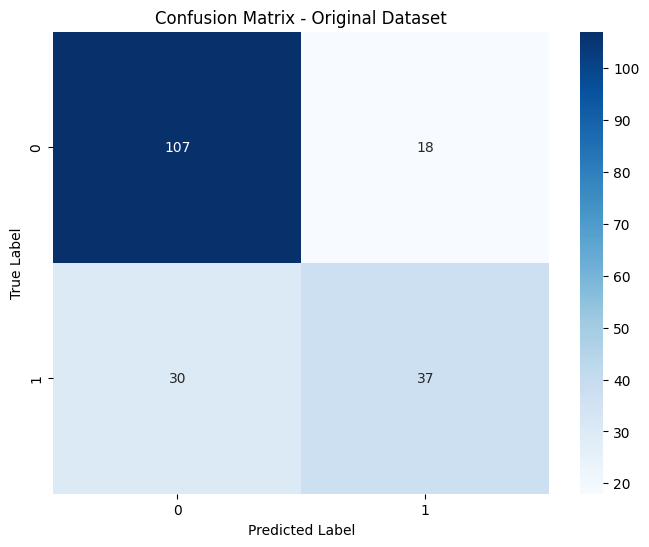

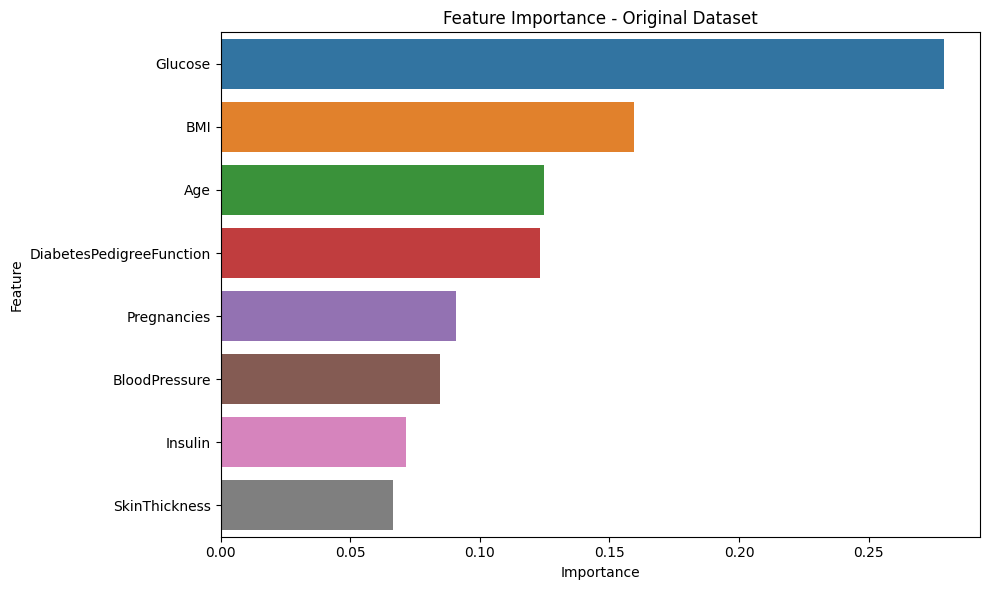

=== Random Forest Results for Cleaned Dataset ===
Accuracy: 0.7448

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       125
           1       0.66      0.55      0.60        67

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.74      0.74      0.74       192



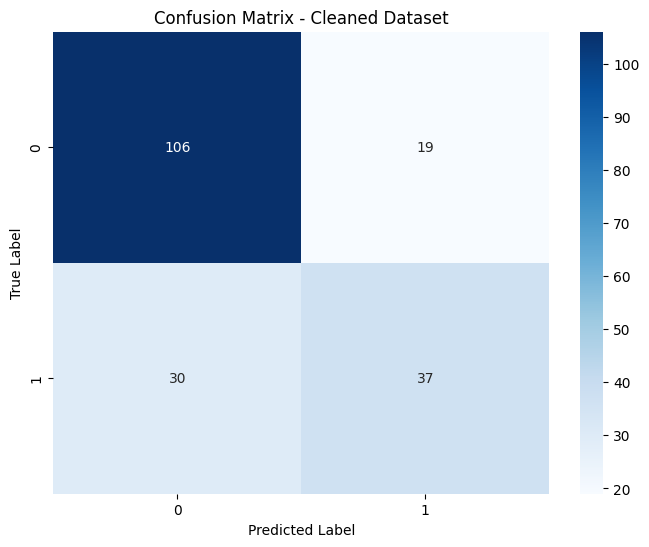

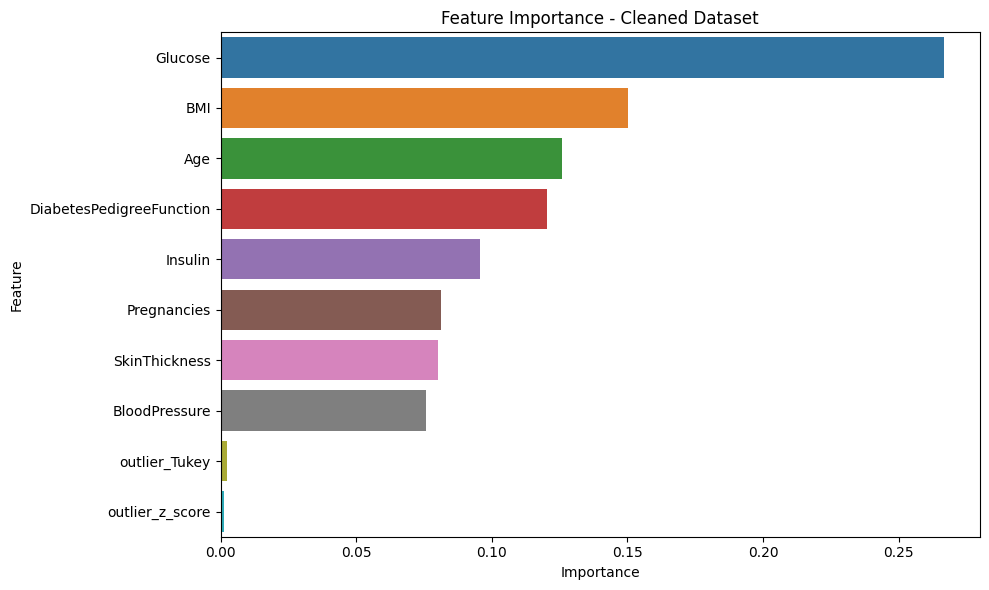


Performing hyperparameter tuning...

=== Hyperparameter Tuning for Original Dataset ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.7674
Test Accuracy with Best Parameters: 0.7500

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.68      0.54      0.60        67

    accuracy                           0.75       192
   macro avg       0.73      0.70      0.71       192
weighted avg       0.74      0.75      0.74       192



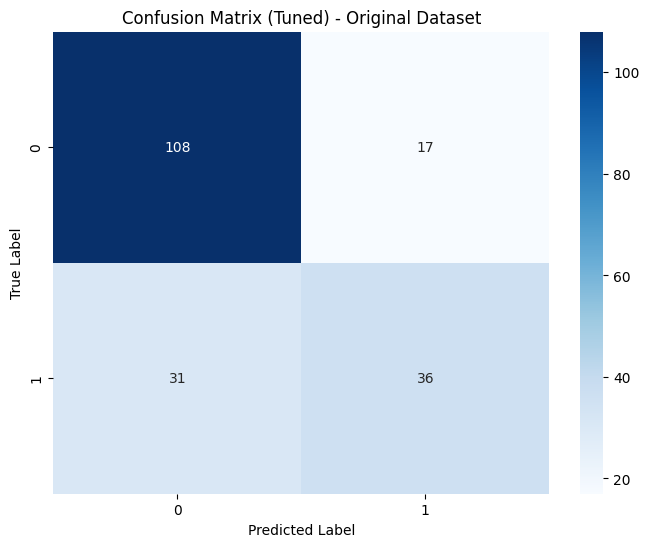

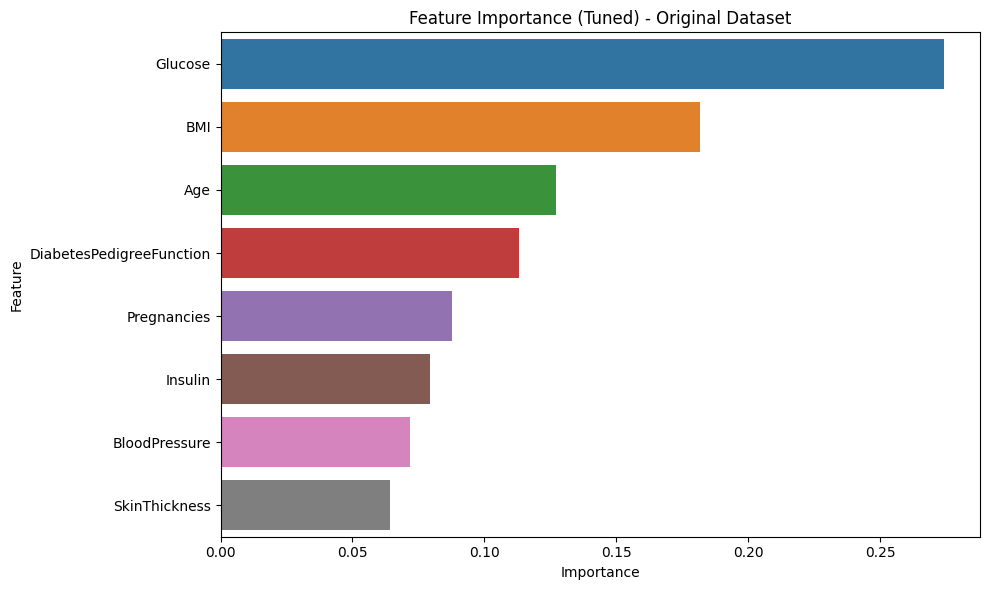


=== Hyperparameter Tuning for Cleaned Dataset ===
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.7709
Test Accuracy with Best Parameters: 0.7552

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       125
           1       0.67      0.58      0.62        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



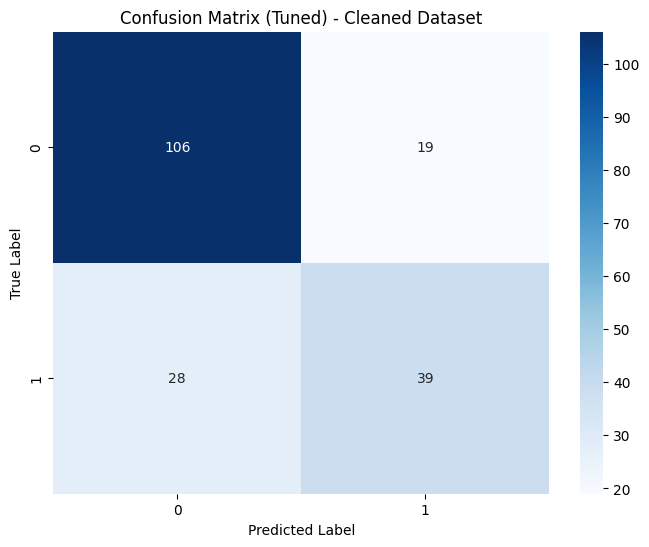

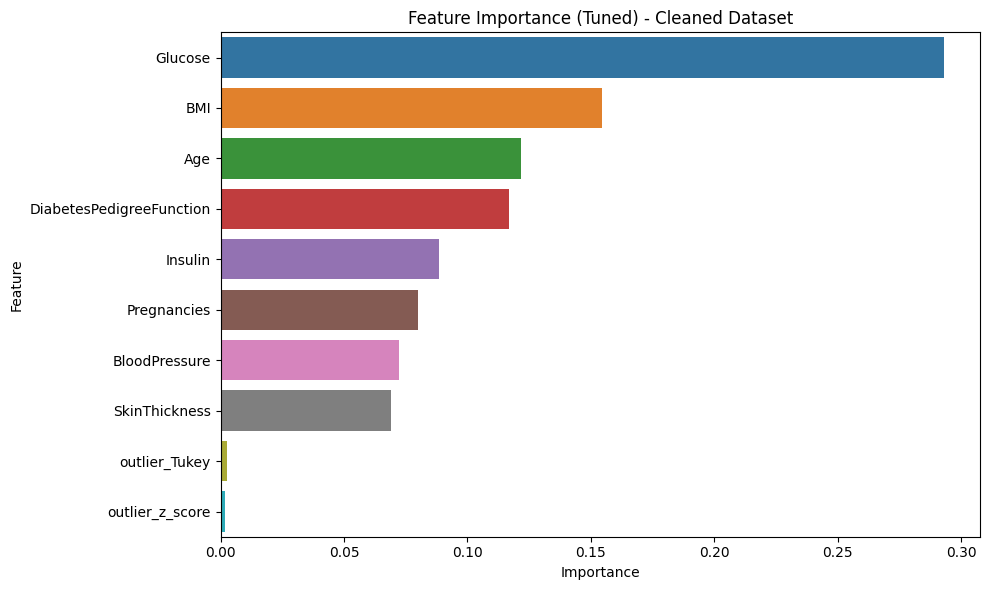

In [ ]:
# 1. First, train and evaluate models with default parameters
print("Training and evaluating models with default parameters...")
rf_original, rf_importance_original = train_evaluate_rf(diab, "Original Dataset")
rf_cleaned, rf_importance_cleaned = train_evaluate_rf(diab_cleaned, "Cleaned Dataset")

xgb_original, xgb_importance_original = train_evaluate_xgb(diab, "Original Dataset")
xgb_cleaned, xgb_importance_cleaned = train_evaluate_xgb(diab_cleaned, "Cleaned Dataset")

# 2. Hyperparameter tuning for both datasets and both models
print("\nPerforming hyperparameter tuning...")
best_rf_original, best_rf_importance_original = tune_rf_hyperparameters(diab, "Original Dataset")
best_rf_cleaned, best_rf_importance_cleaned = tune_rf_hyperparameters(diab_cleaned, "Cleaned Dataset")

best_xgb_original, best_xgb_importance_original = tune_xgb_hyperparameters(diab, "Original Dataset")
best_xgb_cleaned, best_xgb_importance_cleaned = tune_xgb_hyperparameters(diab_cleaned, "Cleaned Dataset")


### Feature importance plot and classification reports


=== Model Comparison ===
Top 3 Important Features (Original Dataset):
   Feature  Importance
1  Glucose    0.279030
5      BMI    0.159337
7      Age    0.124691

Top 3 Important Features (Cleaned Dataset):
   Feature  Importance
1  Glucose    0.266650
5      BMI    0.150246
7      Age    0.125796

Top 3 Important Features (Tuned Original Dataset):
   Feature  Importance
1  Glucose    0.274195
5      BMI    0.181908
7      Age    0.127162

Top 3 Important Features (Tuned Cleaned Dataset):
   Feature  Importance
1  Glucose    0.292991
5      BMI    0.154569
7      Age    0.121698


<Figure size 1200x800 with 0 Axes>

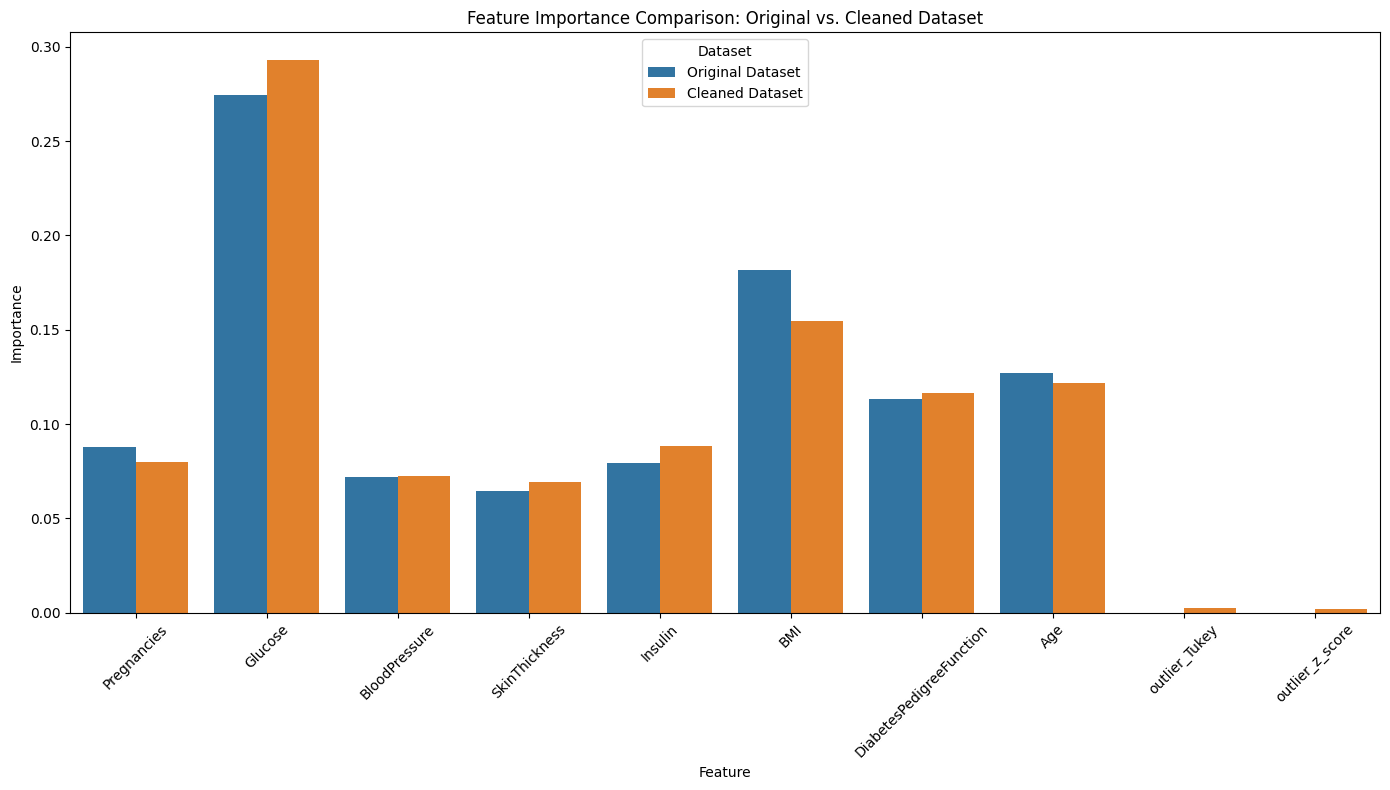

In [ ]:
# 3. Compare the models and feature importance
print("\n=== Model Comparison ===")
# Compare top features
print("Top 3 Important Features (Original Dataset - RF):")
print(best_rf_importance_original.head(3))
print("\nTop 3 Important Features (Cleaned Dataset - RF):")
print(best_rf_importance_cleaned.head(3))
print("\nTop 3 Important Features (Original Dataset - XGB):")
print(best_xgb_importance_original.head(3))
print("\nTop 3 Important Features (Cleaned Dataset - XGB):")
print(best_xgb_importance_cleaned.head(3))

# 4. Comparison plot of feature importance between original and cleaned datasets for Random Forest
plt.figure(figsize=(12, 8))

# Check if both datasets have the same features
original_features = diab.drop('Outcome', axis=1).columns
cleaned_features = diab_cleaned.drop('Outcome', axis=1).columns

# Create separate DataFrames for each dataset's RF feature importance
rf_original_df = pd.DataFrame({
    'Feature': original_features,
    'Importance': best_rf_original.feature_importances_,
    'Dataset': 'Original Dataset'
})

rf_cleaned_df = pd.DataFrame({
    'Feature': cleaned_features,
    'Importance': best_rf_cleaned.feature_importances_,
    'Dataset': 'Cleaned Dataset'
})

# Combine the DataFrames - only include common features
common_features = set(original_features).intersection(set(cleaned_features))
rf_original_df_filtered = rf_original_df[rf_original_df['Feature'].isin(common_features)]
rf_cleaned_df_filtered = rf_cleaned_df[rf_cleaned_df['Feature'].isin(common_features)]
rf_comparison_df = pd.concat([rf_original_df_filtered, rf_cleaned_df_filtered])

# Create the grouped bar chart for Random Forest
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Importance', hue='Dataset', data=rf_comparison_df)
plt.title('RF Feature Importance Comparison: Original vs. Cleaned Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Comparison plot of feature importance between original and cleaned datasets for XGBoost
# Create separate DataFrames for each dataset's XGB feature importance
xgb_original_df = pd.DataFrame({
    'Feature': original_features,
    'Importance': best_xgb_original.feature_importances_,
    'Dataset': 'Original Dataset'
})

xgb_cleaned_df = pd.DataFrame({
    'Feature': cleaned_features,
    'Importance': best_xgb_cleaned.feature_importances_,
    'Dataset': 'Cleaned Dataset'
})

# Combine the DataFrames - only include common features
xgb_original_df_filtered = xgb_original_df[xgb_original_df['Feature'].isin(common_features)]
xgb_cleaned_df_filtered = xgb_cleaned_df[xgb_cleaned_df['Feature'].isin(common_features)]
xgb_comparison_df = pd.concat([xgb_original_df_filtered, xgb_cleaned_df_filtered])

# Create the grouped bar chart for XGBoost
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Importance', hue='Dataset', data=xgb_comparison_df)
plt.title('XGBoost Feature Importance Comparison: Original vs. Cleaned Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Compare RF vs XGBoost feature importance on cleaned dataset
rf_cleaned_importance = pd.DataFrame({
    'Feature': cleaned_features,
    'Importance': best_rf_cleaned.feature_importances_,
    'Model': 'Random Forest'
})

xgb_cleaned_importance = pd.DataFrame({
    'Feature': cleaned_features,
    'Importance': best_xgb_cleaned.feature_importances_,
    'Model': 'XGBoost'
})

# Combine the models' importance data
model_comparison_df = pd.concat([rf_cleaned_importance, xgb_cleaned_importance])

# Create the grouped bar chart comparing models
plt.figure(figsize=(14, 8))
sns.barplot(x='Feature', y='Importance', hue='Model', data=model_comparison_df)
plt.title('Feature Importance Comparison: Random Forest vs. XGBoost (Cleaned Dataset)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Visualize the decision boundary for the top features for XGBoost
def plot_decision_boundary(model, X, y, feature1, feature2, dataset_name, model_name):
    # Check if features exist in the dataset
    if feature1 not in X.columns or feature2 not in X.columns:
        print(f"Warning: Features {feature1} or {feature2} not found in {dataset_name}. Skipping plot.")
        return
        
    # Use only the two most important features
    X_reduced = X[[feature1, feature2]]
    
    # Create a mesh grid
    h = 0.02  # step size in the mesh
    x_min, x_max = X_reduced[feature1].min() - 1, X_reduced[feature1].max() + 1
    y_min, y_max = X_reduced[feature2].min() - 1, X_reduced[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    
    # Plot the data points
    scatter = plt.scatter(X_reduced[feature1], X_reduced[feature2], c=y, 
                          edgecolor='k', s=50, cmap='viridis')
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f'Decision Boundary ({model_name} - {dataset_name}): {feature1} vs {feature2}')
    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

# Get the top 2 features from each model
rf_top_features_original = best_rf_importance_original['Feature'].values[:2]
rf_top_features_cleaned = best_rf_importance_cleaned['Feature'].values[:2]
xgb_top_features_original = best_xgb_importance_original['Feature'].values[:2]
xgb_top_features_cleaned = best_xgb_importance_cleaned['Feature'].values[:2]

# Prepare data for decision boundary plots
X_original = diab.drop('Outcome', axis=1)
y_original = diab['Outcome']
X_cleaned = diab_cleaned.drop('Outcome', axis=1)
y_cleaned = diab_cleaned['Outcome']

print("\nPlotting decision boundaries using top features...")
# Decision boundaries for RF
plot_decision_boundary(best_rf_original, X_original, y_original, 
                       rf_top_features_original[0], rf_top_features_original[1], 
                       "Original Dataset", "Random Forest")
plot_decision_boundary(best_rf_cleaned, X_cleaned, y_cleaned, 
                       rf_top_features_cleaned[0], rf_top_features_cleaned[1], 
                       "Cleaned Dataset", "Random Forest")

# Decision boundaries for XGBoost
plot_decision_boundary(best_xgb_original, X_original, y_original, 
                       xgb_top_features_original[0], xgb_top_features_original[1], 
                       "Original Dataset", "XGBoost")
plot_decision_boundary(best_xgb_cleaned, X_cleaned, y_cleaned, 
                       xgb_top_features_cleaned[0], xgb_top_features_cleaned[1], 
                       "Cleaned Dataset", "XGBoost")

# 8. Summary and Conclusion
print("\n=== Summary and Conclusion ===")
# Prepare a comparison DataFrame of model performance
models = ['RF (Original)', 'RF (Cleaned)', 'XGBoost (Original)', 'XGBoost (Cleaned)']
accuracy_scores = []

# Get test sets
X_original_test = X_test
y_original_test = y_test

# Calculate accuracy for each model
rf_original_accuracy = accuracy_score(y_test, best_rf_original.predict(X_test))
rf_cleaned_accuracy = accuracy_score(y_test, best_rf_cleaned.predict(X_test))
xgb_original_accuracy = accuracy_score(y_test, best_xgb_original.predict(X_test))
xgb_cleaned_accuracy = accuracy_score(y_test, best_xgb_cleaned.predict(X_test))

# Store accuracy scores
accuracy_scores = [rf_original_accuracy, rf_cleaned_accuracy, 
                   xgb_original_accuracy, xgb_cleaned_accuracy]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores
})

# Display model performance comparison
print("Model Performance Comparison:")
print(comparison_df)

# Plot model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=comparison_df)
plt.title('Model Performance Comparison')
plt.ylim(0.7, 0.85)  # Adjust y-axis for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nConclusion:")
print("1. Impact of data cleaning on model performance:")
print(f"   - Random Forest: {rf_cleaned_accuracy - rf_original_accuracy:.4f} improvement")
print(f"   - XGBoost: {xgb_cleaned_accuracy - xgb_original_accuracy:.4f} improvement")
print("\n2. Comparing Random Forest vs XGBoost:")
print(f"   - Original data: XGBoost outperforms RF by {xgb_original_accuracy - rf_original_accuracy:.4f}")
print(f"   - Cleaned data: XGBoost outperforms RF by {xgb_cleaned_accuracy - rf_cleaned_accuracy:.4f}")
print("\n3. Most important features identified:")
print("   - Random Forest (cleaned data):", ", ".join(best_rf_importance_cleaned['Feature'].values[:3]))
print("   - XGBoost (cleaned data):", ", ".join(best_xgb_importance_cleaned['Feature'].values[:3]))
print("\n4. Recommendations:")
print("   - Preferred model:", "XGBoost" if xgb_cleaned_accuracy > rf_cleaned_accuracy else "Random Forest", "with cleaned data")
print("   - Focus on these features for diabetes prediction:", 
      ", ".join(set(best_rf_importance_cleaned['Feature'].values[:3]).union(
                set(best_xgb_importance_cleaned['Feature'].values[:3]))))